In [3]:
#Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce

## Data Understanding ds_reviews

In [2]:
# Load data ds_reviews
ds_reviews = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name='Reviews')
ds_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78651 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

In [3]:
ds_reviews.head()

localID          extractionDate  globalRating  positionOnRanking  \
0  MAG001 2021-08-20 08:24:40.077           4.5                  1   
1  MAG001 2021-08-20 08:24:40.097           4.5                  1   
2  MAG001 2021-08-20 08:24:40.117           4.5                  1   
3  MAG001 2021-08-20 08:24:40.147           4.5                  1   
4  MAG001 2021-08-20 08:24:40.159           4.5                  1   

   sitesOnRanking  totalReviews                  userName      userLocation  \
0            1186        163828     Maurice M@MauriceM171  Indianapolis, IN   
1            1186        163828       nickchamb@nickchamb   Bandon, Ireland   
2            1186        163828  Arthur Villon@arthur4588   Valencia, Spain   
3            1186        163828         James U@696jamesu               NaN   
4            1186        163828     Kamal K Sirra@Sirra63     Madrid, Spain   

   userContributions tripType reviewWritten reviewVisited  reviewRating  \
0                 29  Couples    2021-08-18    2021-08-01             5   
1                  7  Couples    2021-08-17    2021-03-01             5   
2                268  Friends    2021-08-16    2021-08-01             5   
3                  7      NaN    2021-08-16    2021-07-01             5   
4                516   Family    2021-08-15    2021-07-01             4   

  reviewLanguage                                     reviewFullText  
0             en  Absolutely breathtaking use of light, an amazi...  
1             en  A really interesting and beautiful place to vi...  
2             en  Beautiful place and must visit place in barcel...  
3             en  A MUST when visiting Barcelkona.  It is consta...  
4             en  I visited about 20 years ago and there has bee...

In [4]:
# Summary statistics for all variables
ds_reviews.describe(include='all').T

count unique  \
localID              92120    100   
extractionDate       92120    NaN   
globalRating       92120.0    NaN   
positionOnRanking  92120.0    NaN   
sitesOnRanking     92120.0    NaN   
totalReviews       92120.0    NaN   
userName             92100  65785   
userLocation         78651  12612   
userContributions  92120.0    NaN   
tripType             63052      5   
reviewWritten        92120    NaN   
reviewVisited        91410    NaN   
reviewRating       92120.0    NaN   
reviewLanguage       92120      1   
reviewFullText       92120  85088   

                                                                 top   freq  \
localID                                                       MAG001   8309   
extractionDate                                                   NaN    NaN   
globalRating                                                     NaN    NaN   
positionOnRanking                                                NaN    NaN   
sitesOnRanking                                                   NaN    NaN   
totalReviews                                                     NaN    NaN   
userName                                       Malgorzata@Margo7850p     31   
userLocation                                              London, UK   3710   
userContributions                                                NaN    NaN   
tripType                                                     Couples  31702   
reviewWritten                                                    NaN    NaN   
reviewVisited                                                    NaN    NaN   
reviewRating                                                     NaN    NaN   
reviewLanguage                                                    en  92120   
reviewFullText     Is a nice place to visit when you visit Barcel...      3   

                                            mean                         min  \
localID                                      NaN                         NaN   
extractionDate     2021-08-20 22:09:20.598932992  2021-08-20 08:24:40.077000   
globalRating                            4.485166                         4.0   
positionOnRanking                        3.91459                         1.0   
sitesOnRanking                        748.263537                         5.0   
totalReviews                        40556.601813                      5179.0   
userName                                     NaN                         NaN   
userLocation                                 NaN                         NaN   
userContributions                      477.52056                         0.0   
tripType                                     NaN                         NaN   
reviewWritten      2019-09-02 16:05:57.967868160         2019-01-01 00:00:00   
reviewVisited      2019-07-19 02:09:01.122415104         2015-10-01 00:00:00   
reviewRating                            4.578658                         1.0   
reviewLanguage                               NaN                         NaN   
reviewFullText                               NaN                         NaN   

                                             25%  \
localID                                      NaN   
extractionDate     2021-08-20 12:08:10.831000064   
globalRating                                 4.5   
positionOnRanking                            1.0   
sitesOnRanking                             154.0   
totalReviews                             14152.0   
userName                                     NaN   
userLocation                                 NaN   
userContributions                           20.0   
tripType                                     NaN   
reviewWritten                2019-05-11 00:00:00   
reviewVisited                2019-04-01 00:00:00   
reviewRating                                 4.0   
reviewLanguage                               NaN   
reviewFullText                               NaN   

                                             50% 

In [5]:
# Check missing values
print(ds_reviews.isnull().sum())

localID                  0
extractionDate           0
globalRating             0
positionOnRanking        0
sitesOnRanking           0
totalReviews             0
userName                20
userLocation         13469
userContributions        0
tripType             29068
reviewWritten            0
reviewVisited          710
reviewRating             0
reviewLanguage           0
reviewFullText           0
dtype: int64


## Data Understanding DS_Attractions

In [6]:
ds_attractions= pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name= 'Attractions', decimal=',')
ds_attractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       100 non-null    object
 1   Name     100 non-null    object
 2   Country  100 non-null    object
 3   ISO      100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [7]:
ds_attractions.head()

ID                             Name         Country ISO
0  MAG001  Basilica of the Sagrada Familia           Spain  ES
1  MAG002                       Parc Guell           Spain  ES
2  MAG003                  Tower of London         England  UK
3  MAG004                      Casa Batllo           Spain  ES
4  MAG005             Staromestske namesti  Czech Republic  CZ

In [8]:
ds_attractions.describe().T

count unique       top freq
ID        100    100    MAG001    1
Name      100     99  Old Town    2
Country   100     26     Spain   17
ISO       100     25        ES   17

# Data Understanding DS_Holidays

In [4]:
#Load data ds_holidays
ds_holidays = pd.read_csv('Holidays.csv', sep=";")
ds_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69557 entries, 0 to 69556
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            69557 non-null  int64 
 1   countryOrRegion       69557 non-null  object
 2   holidayName           69557 non-null  object
 3   normalizeHolidayName  69557 non-null  object
 4   isPaidTimeOff         3934 non-null   object
 5   countryRegionCode     64559 non-null  object
 6   date                  69557 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [5]:
# Summary statistics for all variables
ds_holidays.describe(include='all').T

count unique         top  freq     mean           std  \
Unnamed: 0            69557.0    NaN         NaN   NaN  34778.0  20079.520674   
countryOrRegion         69557     38      Sweden  8394      NaN           NaN   
holidayName             69557    483      Søndag  6386      NaN           NaN   
normalizeHolidayName    69557    438      Søndag  6386      NaN           NaN   
isPaidTimeOff            3934      2        True  2695      NaN           NaN   
countryRegionCode       64559     34          SE  8394      NaN           NaN   
date                    69557  20665  2001-01-01    37      NaN           NaN   

                      min      25%      50%      75%      max  
Unnamed: 0            0.0  17389.0  34778.0  52167.0  69556.0  
countryOrRegion       NaN      NaN      NaN      NaN      NaN  
holidayName           NaN      NaN      NaN      NaN      NaN  
normalizeHolidayName  NaN      NaN      NaN      NaN      NaN  
isPaidTimeOff         NaN      NaN      NaN      NaN      NaN  
countryRegionCode     NaN      NaN      NaN      NaN      NaN  
date                  NaN      NaN      NaN      NaN      NaN

In [6]:
# Check missing values
print(ds_holidays.isnull().sum())

Unnamed: 0                  0
countryOrRegion             0
holidayName                 0
normalizeHolidayName        0
isPaidTimeOff           65623
countryRegionCode        4998
date                        0
dtype: int64


## Data preparation DS_Holidays

We decided to remove columns isPaidTimeOff, countryRegionCode and normalizeHolidayName because isPaidTimeOff has too many nulls, countryRegionCode and normalizeHolidayName have redundant information we have the same information on countryOrRegion and holidayName, respectively.

In [7]:
#remove columns isPaidTimeOff, countryRegionCode and normalizeHolidayName
columns_to_remove = ['isPaidTimeOff', 'countryRegionCode', 'normalizeHolidayName']
ds_holidays = ds_holidays.drop(columns=columns_to_remove)
ds_holidays.head(5)

Unnamed: 0 countryOrRegion                 holidayName        date
0           0       Argentina  Año Nuevo [New Year's Day]  1970-01-01
1           1       Australia              New Year's Day  1970-01-01
2           2         Austria                     Neujahr  1970-01-01
3           3         Belgium               Nieuwjaarsdag  1970-01-01
4           4          Brazil                    Ano novo  1970-01-01

We decided to only keep the years 2019, 2020, 2021 because ds_reviews has more information of these 3 years and also because we think it's more insightful for the purpose of this project

In [8]:
#Remove dates before 2019 and after 2021
ds_holidays = ds_holidays[(ds_holidays['date']>='2019-01-01') & (ds_holidays['date']<'2022-01-01')]

In [9]:
ds_holidays.head(5)

Unnamed: 0 countryOrRegion                 holidayName        date
25392       25392       Argentina  Año Nuevo [New Year's Day]  2019-01-01
25393       25393       Australia              New Year's Day  2019-01-01
25394       25394         Austria                     Neujahr  2019-01-01
25395       25395         Belarus                   Новый год  2019-01-01
25396       25396         Belgium               Nieuwjaarsdag  2019-01-01

## Data preparation DS_Attractions

In [15]:
#remove columns reviewLanguage (we already know all the reviews are in english)
ds_reviews = ds_reviews.drop('reviewLanguage', axis=1)
ds_reviews.head(5)

localID          extractionDate  globalRating  positionOnRanking  \
0  MAG001 2021-08-20 08:24:40.077           4.5                  1   
1  MAG001 2021-08-20 08:24:40.097           4.5                  1   
2  MAG001 2021-08-20 08:24:40.117           4.5                  1   
3  MAG001 2021-08-20 08:24:40.147           4.5                  1   
4  MAG001 2021-08-20 08:24:40.159           4.5                  1   

   sitesOnRanking  totalReviews                  userName      userLocation  \
0            1186        163828     Maurice M@MauriceM171  Indianapolis, IN   
1            1186        163828       nickchamb@nickchamb   Bandon, Ireland   
2            1186        163828  Arthur Villon@arthur4588   Valencia, Spain   
3            1186        163828         James U@696jamesu               NaN   
4            1186        163828     Kamal K Sirra@Sirra63     Madrid, Spain   

   userContributions tripType reviewWritten reviewVisited  reviewRating  \
0                 29  Couples    2021-08-18    2021-08-01             5   
1                  7  Couples    2021-08-17    2021-03-01             5   
2                268  Friends    2021-08-16    2021-08-01             5   
3                  7      NaN    2021-08-16    2021-07-01             5   
4                516   Family    2021-08-15    2021-07-01             4   

                                      reviewFullText  
0  Absolutely breathtaking use of light, an amazi...  
1  A really interesting and beautiful place to vi...  
2  Beautiful place and must visit place in barcel...  
3  A MUST when visiting Barcelkona.  It is consta...  
4  I visited about 20 years ago and there has bee...

When we opened the excel file we noticed some issues in the attraction sheet: We had an attraction for Scotland where the name was incorrect and we also found a miss matching value in one of poland's atractions where the ISO was HR which represents Croacia.

In [16]:
#Fixing issues in the attractions sheet
ds_attractions['Country'] = np.where(ds_attractions['Country'] == 'Scot', 'Scotland', ds_attractions['Country'])
ds_attractions['ISO'] = np.where((ds_attractions['ISO'] == 'HR') & (ds_attractions['Country'] == 'Poland'), 'PL', ds_attractions['ISO'])

We also found a country that isn't in Europe so we will remove all reviews related to it

In [17]:
#We also found a country in the attraction sheet that doesn't belong to Europe anymore, so we will remove it from out dataset.
ds_attractions[ds_attractions['Country'] == 'Curaçao']

ID                       Name  Country ISO
82  MAG083  Queen Emma Pontoon Bridge  Curaçao  NL

In [18]:
ds_reviews['localID'] = np.where(ds_reviews['localID'] == 'MAG083', np.nan, ds_reviews['localID'])
ds_reviews.dropna(subset=['localID'], inplace=True)
ds_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91699 entries, 0 to 92119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            91699 non-null  object        
 1   extractionDate     91699 non-null  datetime64[ns]
 2   globalRating       91699 non-null  float64       
 3   positionOnRanking  91699 non-null  int64         
 4   sitesOnRanking     91699 non-null  int64         
 5   totalReviews       91699 non-null  int64         
 6   userName           91679 non-null  object        
 7   userLocation       78297 non-null  object        
 8   userContributions  91699 non-null  int64         
 9   tripType           62755 non-null  object        
 10  reviewWritten      91699 non-null  datetime64[ns]
 11  reviewVisited      90989 non-null  datetime64[ns]
 12  reviewRating       91699 non-null  int64         
 13  reviewFullText     91699 non-null  object        
dtypes: datetime

In [19]:
#Replace "u" and "genis" on localID considering reviewFulltext

# Searching for keywords in the Reviewfulltext column
keywords_sco = ['Castle', 'Crown Jewels', '1 o clock guns', '1oclock gun', 'One o clock', 'Military', 'Hill', 'Cannon']

# Filtering 'U' values inside localId to match the Keywords against it
u_localID = ds_reviews[ds_reviews['localID'].str.contains('u', na=False)]

# Rows containing the keywords
rows_keywords_sco = u_localID['reviewFullText'].str.contains('|'.join(keywords_sco), case=False, na=False)

# Counting the number of rows in the filtered subset containing at least one keyword
keywords_count_rows = sum(rows_keywords_sco)
print(keywords_count_rows)

3800


In [20]:
# Changing 'localID' values to 'MAG006' for the rows that contain the keywords for Scotland
ds_reviews.loc[u_localID[rows_keywords_sco].index, 'localID'] = 'MAG006'

In [21]:
#Re running previouvs code to make sure changes were aplied
u_localID = ds_reviews[ds_reviews['localID'].str.contains('u', na=False)]
rows_keywords_sco = u_localID['reviewFullText'].str.contains('|'.join(keywords_sco), case=False, na=False)
keywords_count_rows_sco = sum(rows_keywords_sco)
print(keywords_count_rows_sco)

0


In [22]:
# Searching for keywords in the Reviewfulltext column
keywords_spa = ['Avila','Avilla','muralla','Toledo','Wall','Segovia']

# Filtering 'U' values inside localId to match the Keywords against it
u_localID = ds_reviews[ds_reviews['localID'].str.contains('u', na=False)]

# Rows containing the keywords
rows_keywords_spa = u_localID['reviewFullText'].str.contains('|'.join(keywords_spa), case=False, na=False)

# Counting the number of rows in the filtered subset containing at least one keyword
keywords_count_rows_spa = sum(rows_keywords_spa)
print(keywords_count_rows_spa)

18


In [23]:
# Changing 'localID' values to 'MAG098' for the rows that contain the keywords for Spain
ds_reviews.loc[u_localID[rows_keywords_spa].index, 'localID'] = 'MAG098'

In [24]:
# Searching for keywords in the Reviewfulltext column
keywords_cze = ['square','Astronomical','Prague','Squares','old clock', 'old town','']

# Filtering 'U' values inside localId to match the Keywords against it
genis_localID = ds_reviews[ds_reviews['localID'].str.contains('genis', na=False)]

# Rows containing the keywords
rows_keywords_cze = genis_localID['reviewFullText'].str.contains('|'.join(keywords_cze), case=False, na=False)

# Counting the number of rows in the filtered subset containing at least one keyword
keywords_count_rows_cze = sum(rows_keywords_cze)
print(keywords_count_rows_cze)

500


In [25]:
# Changing 'localID' values to 'MAG098' for the rows that contain the keywords for czech Republic
ds_reviews.loc[genis_localID[rows_keywords_cze].index, 'localID'] = 'MAG005'

In [26]:
#Re running previouvs code to make sure changes were aplied
genis_localID = ds_reviews[ds_reviews['localID'].str.contains('genis', na=False)]
rows_keywords_cze = genis_localID['reviewFullText'].str.contains('|'.join(keywords_cze), case=False, na=False)
keywords_count_rows_cze = sum(rows_keywords_cze)
print(keywords_count_rows_cze)

0


In [27]:
#Now that we found all the other reviews that didn't belong to scotland we can attribute all other to MAG006
ds_reviews['localID'].replace('u', 'MAG006', inplace=True)

In [28]:
#Removing duplicates
ds_reviews.drop_duplicates(inplace=True) 
ds_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91699 entries, 0 to 92119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            91699 non-null  object        
 1   extractionDate     91699 non-null  datetime64[ns]
 2   globalRating       91699 non-null  float64       
 3   positionOnRanking  91699 non-null  int64         
 4   sitesOnRanking     91699 non-null  int64         
 5   totalReviews       91699 non-null  int64         
 6   userName           91679 non-null  object        
 7   userLocation       78297 non-null  object        
 8   userContributions  91699 non-null  int64         
 9   tripType           62755 non-null  object        
 10  reviewWritten      91699 non-null  datetime64[ns]
 11  reviewVisited      90989 non-null  datetime64[ns]
 12  reviewRating       91699 non-null  int64         
 13  reviewFullText     91699 non-null  object        
dtypes: datetime

### ??? need more detail

In [29]:
ds_reviews[ds_reviews.duplicated(subset=["reviewFullText"], keep = False)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14001 entries, 260 to 91997
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            14001 non-null  object        
 1   extractionDate     14001 non-null  datetime64[ns]
 2   globalRating       14001 non-null  float64       
 3   positionOnRanking  14001 non-null  int64         
 4   sitesOnRanking     14001 non-null  int64         
 5   totalReviews       14001 non-null  int64         
 6   userName           14001 non-null  object        
 7   userLocation       11944 non-null  object        
 8   userContributions  14001 non-null  int64         
 9   tripType           9691 non-null   object        
 10  reviewWritten      14001 non-null  datetime64[ns]
 11  reviewVisited      13896 non-null  datetime64[ns]
 12  reviewRating       14001 non-null  int64         
 13  reviewFullText     14001 non-null  object        
dtypes: dateti

In [30]:
ds_reviews[ds_reviews.duplicated(subset=["reviewFullText"], keep=False)].sort_values(by="userName").head(38)

localID          extractionDate  globalRating  positionOnRanking  \
36332  MAG013 2021-08-20 14:12:52.162           4.5                  1   
36322  MAG013 2021-08-20 14:12:49.684           4.5                  1   
84558  MAG075 2021-08-21 15:11:04.680           4.5                  3   
84568  MAG075 2021-08-21 15:11:08.199           4.5                  3   
12919  MAG003 2021-08-20 10:26:11.295           4.5                  7   
12929  MAG003 2021-08-20 10:26:13.546           4.5                  7   
84351  MAG075 2021-08-21 15:08:59.759           4.5                  3   
84361  MAG075 2021-08-21 15:09:02.964           4.5                  3   
32372  MAG011 2021-08-20 13:35:35.050           4.5                  3   
32382  MAG011 2021-08-20 13:35:37.566           4.5                  3   
50130  MAG024 2021-08-20 16:24:53.648           4.5                  1   
50140  MAG024 2021-08-20 16:24:55.818           4.5                  1   
12918  MAG003 2021-08-20 10:26:11.264           4.5                  7   
12928  MAG003 2021-08-20 10:26:13.524           4.5                  7   
68545  MAG042 2021-08-21 12:30:08.622           4.5                  3   
68535  MAG042 2021-08-21 12:30:05.978           4.5                  3   
27575  MAG008 2021-08-20 12:50:02.519           4.5                  1   
27585  MAG008 2021-08-20 12:50:04.934           4.5                  1   
8035   MAG001 2021-08-20 09:41:33.793           4.5                  1   
8045   MAG001 2021-08-20 09:41:35.887           4.5                  1   
45117  MAG020 2021-08-20 15:37:43.973           4.5                 12   
45107  MAG020 2021-08-20 15:37:40.774           4.5                 12   
40179  MAG016 2021-08-20 14:49:57.896           4.5                  3   
40189  MAG016 2021-08-20 14:50:00.271           4.5                  3   
41871  MAG017 2021-08-20 15:06:26.392           4.5                  1   
41881  MAG017 2021-08-20 15:06:28.794           4.5                  1   
34770  MAG012 2021-08-20 13:57:40.676           4.5                  2   
34780  MAG012 2021-08-20 13:57:43.512           4.5                  2   
15555  MAG003 2021-08-20 10:51:17.537           4.5                  7   
15545  MAG003 2021-08-20 10:51:15.347           4.5                  7   
51863  MAG024 2021-08-20 16:40:38.523           4.5                  1   
51853  MAG024 2021-08-20 16:40:35.878           4.5                  1   
28532  MAG009 2021-08-20 12:58:55.212           4.5                  1   
28542  MAG009 2021-08-20 12:58:57.352           4.5                  1   
52573  MAG025 2021-08-20 16:47:33.351           4.5                  1   
52583  MAG025 2021-08-20 16:47:35.971           4.5                  1   
27590  MAG008 2021-08-20 12:50:05.140           4.5                  1   
27580  MAG008 2021-08-20 12:50:02.690           4.5                  1   

       sitesOnRanking  totalReviews                              userName  \
36332             484         34353  #travelswithhugodog@ajotraveller2016   
36322             484         34353  #travelswithhugodog@ajotraveller2016   
84558              17          7940                         &Y B@CopCop83   
84568              17          7940                         &Y B@CopCop83   
12919            2383         65646                   06hartley@06hartley   
12929            2383         65646                   06hartley@06hartley   
84351              17          7940                         0xf0rd@0xf0rd   
84361              17          7940                         0xf0rd@0xf0rd   
32372             430         35716                     10023mom@10023mom   
32382             430         35716                     10023mom@10023mom   
50130             188         23131                       107carl@107carl   
50140             188         23131                       107carl@107carl   
12918            2383         65646                   10Vionnet@10Vionnet   
12928            2383         65646      

From this code, we can take away that some of the "reviewFullText" duplicates are not really duplicates. What happens in these cases is that someone that for example went to spain and visited different atractions, didn't want to write reviews for each single atractions so they just copied the review and pasted. 
Taking this into consideration, we will only be keeping the latest record (most updated) when "localID" and "reviewFullText" are the same.

In [31]:
# Drop duplicates based on 'localID' and 'reviewFullText', keeping the last entry
ds_reviews.drop_duplicates(subset=['localID', 'reviewFullText'], inplace=True, keep='last')
ds_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84710 entries, 0 to 92119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            84710 non-null  object        
 1   extractionDate     84710 non-null  datetime64[ns]
 2   globalRating       84710 non-null  float64       
 3   positionOnRanking  84710 non-null  int64         
 4   sitesOnRanking     84710 non-null  int64         
 5   totalReviews       84710 non-null  int64         
 6   userName           84690 non-null  object        
 7   userLocation       72336 non-null  object        
 8   userContributions  84710 non-null  int64         
 9   tripType           57919 non-null  object        
 10  reviewWritten      84710 non-null  datetime64[ns]
 11  reviewVisited      84053 non-null  datetime64[ns]
 12  reviewRating       84710 non-null  int64         
 13  reviewFullText     84710 non-null  object        
dtypes: datetime

In [32]:
#Checking if Changes were aplied
ds_reviews[ds_reviews.duplicated(subset=["reviewFullText"], keep=False)].sort_values(by="userName").head(38)

localID          extractionDate  globalRating  positionOnRanking  \
25445  MAG007 2021-08-20 12:30:17.490           4.5                  2   
75129  MAG054 2021-08-21 13:36:31.194           4.5                 10   
44487  MAG019 2021-08-20 15:31:30.081           4.5                  3   
35032  MAG012 2021-08-20 14:00:13.300           4.5                  2   
9905   MAG002 2021-08-20 09:58:39.100           4.0                 11   
17821  MAG004 2021-08-20 11:13:00.828           4.5                  5   
48823  MAG023 2021-08-20 16:12:30.043           4.5                  7   
17267  MAG004 2021-08-20 11:07:46.387           4.5                  5   
74969  MAG054 2021-08-21 13:34:56.955           4.5                 10   
24718  MAG007 2021-08-20 12:23:40.485           4.5                  2   
52487  MAG025 2021-08-20 16:46:47.244           4.5                  1   
83246  MAG074 2021-08-21 14:58:25.860           4.5                  2   
16806  MAG004 2021-08-20 11:03:45.165           4.5                  5   
48556  MAG023 2021-08-20 16:09:58.497           4.5                  7   
18419  MAG004 2021-08-20 11:18:18.050           4.5                  5   
49569  MAG023 2021-08-20 16:19:29.332           4.5                  7   
10887  MAG002 2021-08-20 10:07:15.266           4.0                 11   
7574   MAG001 2021-08-20 09:37:21.322           4.5                  1   
49524  MAG023 2021-08-20 16:19:01.019           4.5                  7   
1061   MAG001 2021-08-20 08:35:14.620           4.5                  1   
57145  MAG030 2021-08-20 17:38:42.149           4.5                  2   
73086  MAG048 2021-08-21 13:15:56.345           4.5                  1   
55057  MAG027 2021-08-20 17:15:19.167           5.0                  1   
39737  MAG016 2021-08-20 14:45:31.268           4.5                  3   

       sitesOnRanking  totalReviews                        userName  \
25445             861         42555  Anca-Elena Boaca@299ancaelenab   
75129             861         10250  Anca-Elena Boaca@299ancaelenab   
44487             382         26042         Andrew B@K3045YKandrewb   
35032             382         34703         Andrew B@K3045YKandrewb   
9905             1186         75909             Bluebonet@Bluebonet   
17821            1186         57180             Bluebonet@Bluebonet   
48823            1186         23293            David F@426DavidF426   
17267            1186         57180            David F@426DavidF426   
74969             861         10250             Joseph A@josepha532   
24718             861         42555             Joseph A@josepha532   
52487              98         22519             Pancake70@Pancake70   
83246              73          7898             Pancake70@Pancake70   
16806            1186         57180          Sam@Tourist36708628704   
48556            1186         23293          Sam@Tourist36708628704   
18419            1186         57180             c0achdena@c0achdena   
49569            1186         23293             c0achdena@c0achdena   
10887            1186         75909             mrbmclean@mrbmclean   
7574             1186        163828             mrbmclean@mrbmclean   
49524            1186         23293             mrbmclean@mrbmclean   
1061             1186        163828               olimpya@olimpya79   
57145            1186         18474               olimpya@olimpya79   
73086              91         12696           ruthboldes@ruthboldes   
55057            2634         21630           ruthboldes@ruthboldes   
39737            2634         26604           ruthboldes@ruthboldes   

                 userLocation  userContributions tripType reviewWritten  \
25445   Ilfov County, Romania                 18  Couples    2019-06-30   
75129   Ilfov County, Romania                 18  Couples    2019-06-30   
44487          Darlington, UK                 63  Couples    2019-06-28   
35032          Darlington, UK                 63  Couples    2019-06-28   
9905

Once again we will remove the few data we from the year that are not 2019, 2020 and 2021

In [33]:
#Remove dates before 2019 and after 2021 - reviewVisited
ds_reviews = ds_reviews[(ds_reviews['reviewVisited']>='2019-01-01') & (ds_reviews['reviewVisited']<'2022-01-01')]

In [34]:
num_rows_len = len(ds_reviews)
print(num_rows_len)

78409


We decided to Standardize the variable userLocation 

In [35]:
#userLocation Standardization
ds_reviews

localID          extractionDate  globalRating  positionOnRanking  \
0      MAG001 2021-08-20 08:24:40.077           4.5                  1   
1      MAG001 2021-08-20 08:24:40.097           4.5                  1   
2      MAG001 2021-08-20 08:24:40.117           4.5                  1   
3      MAG001 2021-08-20 08:24:40.147           4.5                  1   
4      MAG001 2021-08-20 08:24:40.159           4.5                  1   
...       ...                     ...           ...                ...   
92112  MAG100 2021-08-21 16:27:11.518           4.5                 11   
92113  MAG100 2021-08-21 16:27:11.614           4.5                 11   
92114  MAG100 2021-08-21 16:27:11.705           4.5                 11   
92115  MAG100 2021-08-21 16:27:11.795           4.5                 11   
92116  MAG100 2021-08-21 16:27:11.893           4.5                 11   

       sitesOnRanking  totalReviews                   userName  \
0                1186        163828      Maurice M@MauriceM171   
1                1186        163828        nickchamb@nickchamb   
2                1186        163828   Arthur Villon@arthur4588   
3                1186        163828          James U@696jamesu   
4                1186        163828      Kamal K Sirra@Sirra63   
...               ...           ...                        ...   
92112             677          5179      Diego B@diegobX5676JH   
92113             677          5179             rosa.ji@rosaji   
92114             677          5179  Margrieta K@Margrieta2013   
92115             677          5179              David M@DTM56   
92116             677          5179  robert_bos53@robert_bos53   

                  userLocation  userContributions  tripType reviewWritten  \
0             Indianapolis, IN                 29   Couples    2021-08-18   
1              Bandon, Ireland                  7   Couples    2021-08-17   
2              Valencia, Spain                268   Friends    2021-08-16   
3                          NaN                  7       NaN    2021-08-16   
4                Madrid, Spain                516    Family    2021-08-15   
...                        ...                ...       ...           ...   
92112  Buenos Aires, Argentina                 86   Couples    2019-04-23   
92113                      NaN                 14   Friends    2019-04-23   
92114  Elburg, The Netherlands                403  Business    2019-03-24   
92115            Cambridge, UK               2055   Couples    2019-03-04   
92116      Geneva, Switzerland               1802   Friends    2019-02-25   

      reviewVisited  reviewRating  \
0        2021-08-01             5   
1        2021-03-01             5   
2        2021-08-01             5   
3        2021-07-01             5   
4        2021-07-01             4   
...             ...           ...   
92112    2019-04-01             5   
92113    2019-03-01             5   
92114    2019-03-01             5   
92115    2019-02-01             5   
92116    2019-02-01             5   

                                          reviewFullText  
0      Absolutely breathtaking use of light, an amazi...  
1      A really interesting and beautiful place to vi...  
2      Beautiful place and must visit place in barcel...  
3      A MUST when visiting Barcelkona.  It is consta...  
4      I visited about 20 years ago and there has bee...  
...                                                  ...  
92112  Florence is my favorite Italian city so far.Th...  
92113  I don't even want to review this city, because...  
92114  The old centre of Florence is realy worth the ...  
92115  A lovely old rambling centre with no logical l...  
92116  A one day visit from Rome in February: the his...  

[78409 rows x 14 columns]

In [36]:
ds_reviews['userLocation'].value_counts(dropna=False)

userLocation
NaN                        11423
London, UK                  3169
Melbourne, Australia         644
Sydney, Australia            622
New York City, NY            596
                           ...  
Cold Spring, KY                1
Margao, India                  1
Brandywine, MD                 1
Sayre, PA                      1
Elburg, The Netherlands        1
Name: count, Length: 11984, dtype: int64

In [37]:
#Firstly, it is trying to missing values in the 'userLocation' column are replaced with the string 'Unknown'.
ds_reviews = ds_reviews.copy()

ds_reviews['userLocation'].fillna('Unknown', inplace=True)

In [38]:
ds_reviews['userLocation'].value_counts(dropna=False)

userLocation
Unknown                    11423
London, UK                  3169
Melbourne, Australia         644
Sydney, Australia            622
New York City, NY            596
                           ...  
Cold Spring, KY                1
Margao, India                  1
Brandywine, MD                 1
Sayre, PA                      1
Elburg, The Netherlands        1
Name: count, Length: 11984, dtype: int64

Using a Dataset retrieved from https://simplemaps.com/data/world-cities we are trying to retrieve from the cities_of_the_world the corresponding country and replace it in userLocation since we can see that a lot of the values from this column are cities.

In [41]:
cities_of_the_world = pd.read_excel('World_Cities.xlsx')

In [42]:
#loop through each row of the ds_reviews
for index, row in ds_reviews.iterrows():
    #it gets the value in the 'userLocation' column.
    user_location = row['userLocation']
    #It searches for a matching city in the cities_of_the_world DataFrame based on the 'userLocation'.
    match = cities_of_the_world[cities_of_the_world['city'] == user_location]
    
    # If a match is found, replace the userLocation with the corresponding country
    if not match.empty:
        country = match.iloc[0]['country']
        ds_reviews.at[index, 'userLocation'] = country

In [43]:
ds_reviews['userLocation'].value_counts()

userLocation
Unknown                         11423
London, UK                       3169
United Kingdom                    839
United States                     712
Melbourne, Australia              644
                                ...  
Kaatsheuvel, The Netherlands        1
Postojna, Slovenia                  1
Owen Sound, Canada                  1
Horten, Norway                      1
Elburg, The Netherlands             1
Name: count, Length: 11515, dtype: int64

In [44]:
#there are lot of values with 'City, UK'. It is replacing occurrences of 'UK' in the 'userLocation' column 
#with 'United Kingdom'
ds_reviews['userLocation'] = ds_reviews['userLocation'].str.replace('UK','United Kingdom')

In [45]:
#The second approach to retrieve the countries' names was by installing pycountry library.
#Provides access to details information concerning countries, including country names and country codes.
!pip install pycountry

In [46]:
import pycountry

In [47]:
#First glampse there are a lot of values with 'city, country'. By spliting the location, it could 
#identify the correct country.

#By defying a function 'get_country_info', it is trying to extract country information from a given location.
def get_country_info(location):
    try:
        # Split location into city and country/country code
        location_parts = location.split(', ')
        #Firstly checks if the location was succesfully split into 2 parts
        if len(location_parts) == 2:
            # If the second part is a country name or code, get the country's full name
            country_info = pycountry.countries.get(name=location_parts[-1])
            if country_info:
                return country_info.name  # Return country name
        elif len(location_parts) == 1:
            # If only one part exists (e.g., 'United Kingdom'), try to get country info
            country_info = pycountry.countries.search_fuzzy(location_parts[0])
            if country_info:
                return country_info[0].name  # Return full country name if found
        return location  # Return the original location if no country found
    except:
        return location  # Return the original location in case of exceptions

In [48]:
# Apply the get_country_info function to the 'userLocation' column
ds_reviews['userLocation'] = ds_reviews['userLocation'].apply(get_country_info)

SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='GB-LAN', country_code='GB', name='Lancashire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-NBL', country_code='GB', name='Northumberland', parent='GB-ENG', parent_code='GB-GB-ENG', type='Unitary authority')
SubdivisionHierarchy(code='US-MI', country_code='US', name='Michigan', parent_code=None, type='State')
SubdivisionHierarchy(code='ZW-MI', country_code='ZW', name='Midlands', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-DEV', country_code='GB', name='Devon', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-MN', co

SubdivisionHierarchy(code='US-MA', country_code='US', name='Massachusetts', parent_code=None, type='State')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-TN', country_code='US', name='Tennessee', parent_code=None, type='State')
SubdivisionHierarchy(code='US-UT', country_code='US', name='Utah', parent_code=None, type='State')
SubdivisionHierarchy(code='US-MA', country_code='US', name='Massachusetts', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-STS', country_code='GB', name='Staffordshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-ME', country_code='US', name='Maine', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-HRT', country_code='GB', name='Hertfordshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-CT', country_code='US', name='Connecticut', parent_code=None, typ

SubdivisionHierarchy(code='US-OH', country_code='US', name='Ohio', parent_code=None, type='State')
SubdivisionHierarchy(code='AT-9', country_code='AT', name='Wien', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NY', country_code='US', name='New York', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-STG', country_code='GB', name='Stirling', parent='GB-SCT', parent_code='GB-GB-SCT', type='Council area')
SubdivisionHierarchy(code='US-MN', country_code='US', name='Minnesota', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='US-MO', country_cod

SubdivisionHierarchy(code='US-PA', country_code='US', name='Pennsylvania', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NH', country_code='US', name='New Hampshire', parent_code=None, type='State')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-LIN', country_code='GB', name='Lincolnshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-OH', country_code='US', name='Ohio', parent_code=None, type='State')
SubdivisionHierarchy(code='US-MI', country_code='US', name='Michigan', parent_code=None, type='State')
SubdivisionHierarchy(code='US-ME', country_code='US', name='Maine', parent_code=None, type='State')
SubdivisionHierarchy(code='US-

SubdivisionHierarchy(code='US-MN', country_code='US', name='Minnesota', parent_code=None, type='State')
SubdivisionHierarchy(code='US-CO', country_code='US', name='Colorado', parent_code=None, type='State')
SubdivisionHierarchy(code='US-PA', country_code='US', name='Pennsylvania', parent_code=None, type='State')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='CA-NS', country_code='CA', name='Nova Scotia', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-MAN', country_code='GB', name='Manchester', parent='GB-ENG', parent_code='GB-GB-ENG', type='Metropolitan district')
SubdivisionHierarchy(code='JM-12', country_code='JM', name='Manchester', parent_code=None, ty

SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='PA-8', country_code='PA', name='Panamá', parent_code=None, type='Province')
SubdivisionHierarchy(code='US-MI', country_code='US', name='Michigan', parent_code=None, type='State')
SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-AR', country_code='US', name='Arkansas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NC', country_code='US', name='North Carolina', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-NET', country_code='GB', name='Newcastle upon Tyne', parent='GB-ENG', parent_code='GB-GB-ENG', type='Metropolitan district')
SubdivisionHierarchy(code='US-UT', country_code='US', name='Utah', parent_code=None, type='State')
SubdivisionHierarc

SubdivisionHierarchy(code='US-MA', country_code='US', name='Massachusetts', parent_code=None, type='State')
SubdivisionHierarchy(code='US-MI', country_code='US', name='Michigan', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='IE-CO', country_code='IE', name='Cork', parent='M', parent_code='IE-M', type='County')
SubdivisionHierarchy(code='US-WI', country_code='US', name='Wisconsin', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-BKM', country_code='GB', name='Buckinghamshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-NC', country_code='US', name='North Carolina', parent_code=None, type='State')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-IL', country_code='US', name='Illinois', parent_code=None, type='State')
Subdivisi

SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='ES-B', country_code='ES', name='Barcelona [Barcelona]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='ES-GI', country_code='ES', name='Girona [Gerona]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='ES-L', country_code='ES', name='Lleida [Lérida]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='ES-T', country_code='ES', name='Tarragona [Tarragona]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='US-VT', country_code='US', name='Vermont', parent_code=None, type='State')
SubdivisionHierarchy(code='CA-QC', 

SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-MI', country_code='US', name='Michigan', parent_code=None, type='State')
SubdivisionHierarchy(code='US-OH', country_code='US', name='Ohio', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-NFK', country_code='GB', name='Norfolk', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(

SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='BW-NE', country_code='BW', name='North East', parent_code=None, type='District')
SubdivisionHierarchy(code='GH-NE', country_code='GH', name='North East', parent_code=None, type='Region')
SubdivisionHierarchy(code='SG-02', country_code='SG', name='North East', parent_code=None, type='District')
SubdivisionHierarchy(code='GB-WSX', country_code='GB', name='West Sussex', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-LAN', country_code='GB', name='Lancashire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='BR-RJ', country_code='BR', name='Rio de Janeiro', paren

SubdivisionHierarchy(code='GB-POR', country_code='GB', name='Portsmouth', parent='GB-ENG', parent_code='GB-GB-ENG', type='Unitary authority')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-NBL', country_code='GB', name='Northumberland', parent='GB-ENG', parent_code='GB-GB-ENG', type='Unitary authority')
SubdivisionHierarchy(code='GB-DOR', country_code='GB', name='Dorset', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-DNC', country_code='GB', name='Doncaster', parent='GB-ENG', parent_code='GB-GB-ENG', type='Metropolitan district')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-NYK', country_code='GB', name='North Yorkshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-MAN', country_code='GB', name='Manchester', parent=

SubdivisionHierarchy(code='US-WI', country_code='US', name='Wisconsin', parent_code=None, type='State')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='US-TN', country_code='US', name='Tennessee', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-DNC', country_code='GB', name='Doncaster', parent='GB-ENG', parent_code='GB-GB-ENG', type='Metropolitan district')
SubdivisionHierarchy(code='US-IL', country_code='US', name='Illinois', parent_code=None, type='State')
SubdivisionHierarchy(code='US-OH', country_code='US', name='Ohio', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='US-

SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-CAM', country_code='GB', name='Cambridgeshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NH', country_code='US', name='New Hampshire', parent_code=None, type='State')
SubdivisionHierarchy(code='LR-MY', country_code='LR', name='Maryland', parent_code=None, type='County')
SubdivisionHierarchy(code='US-MD', country_code='US', name='Maryland', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-LIN', country_code='GB', name='Lincolnshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, ty

SubdivisionHierarchy(code='US-AZ', country_code='US', name='Arizona', parent_code=None, type='State')
SubdivisionHierarchy(code='US-MI', country_code='US', name='Michigan', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-DOR', country_code='GB', name='Dorset', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-LAN', country_code='GB', name='Lancashire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-WAR', country_code='GB', name='Warwickshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-MN', country_code='US', name='Minnesota', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jers

SubdivisionHierarchy(code='GB-GLS', country_code='GB', name='Gloucestershire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-AR', country_code='US', name='Arkansas', parent_code=None, type='State')
SubdivisionHierarchy(code='IE-KE', country_code='IE', name='Kildare', parent='L', parent_code='IE-L', type='County')
SubdivisionHierarchy(code='US-NH', country_code='US', name='New Hampshire', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-LDS', country_code='GB', name='Leeds', parent='GB-ENG', parent_code='GB-GB-ENG', type='Metropolitan district')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='US-CT', country_code='US', name='Connecticut', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-LIN', country_code='GB', name='Lincolns

SubdivisionHierarchy(code='GB-BKM', country_code='GB', name='Buckinghamshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-HRT', country_code='GB', name='Hertfordshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='ZW-MI', country_code='ZW', name='Midlands', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-SHR', country_code='GB', name='Shropshire', paren

SubdivisionHierarchy(code='US-NC', country_code='US', name='North Carolina', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NH', country_code='US', name='New Hampshire', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NY', country_code='US', name='New York', parent_code=None, type='State')
SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='ES-B', country_code='ES', name='Barcelona [Barcelona]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code=

SubdivisionHierarchy(code='LR-MY', country_code='LR', name='Maryland', parent_code=None, type='County')
SubdivisionHierarchy(code='US-MD', country_code='US', name='Maryland', parent_code=None, type='State')
SubdivisionHierarchy(code='US-NJ', country_code='US', name='New Jersey', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-NGM', country_code='GB', name='Nottingham', parent='GB-ENG', parent_code='GB-GB-ENG', type='Unitary authority')
SubdivisionHierarchy(code='US-HI', country_code='US', name='Hawaii', parent_code=None, type='State')
SubdivisionHierarchy(code='US-MA', country_code='US', name='Massachusetts', parent_code=None, type='State')
SubdivisionHierarchy(code='US-PA', country_code='US', name='Pennsylvania', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-NYK', country_code='GB', name='North Yorkshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-ESS', country_code='GB', name='Essex', parent='GB-ENG',

SubdivisionHierarchy(code='GB-HAM', country_code='GB', name='Hampshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='PS-JEM', country_code='PS', name='Jerusalem', parent_code=None, type='Governorate')
SubdivisionHierarchy(code='ES-B', country_code='ES', name='Barcelona [Barcelona]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='ES-GI', country_code='ES', name='Girona [Gerona]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='ES-L', country_code='ES', name='Lleida [Lérida]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='ES-T', country_code='ES', name='Tarragona [Tarragona]', parent='CT', parent_code='ES-CT', type='Province')
SubdivisionHierarchy(code='GB-MIK', country_code='GB', name='Milton Keynes', parent='GB-ENG', parent_code='GB-GB-ENG', t

In [49]:
pd.set_option('display.max_rows', None)

In [50]:
ds_reviews['userLocation'].value_counts()
#This code succesfully moved from 3171 to 25023 values for United Kingdom

userLocation
United Kingdom                                              25096
Unknown                                                     11423
Australia                                                    3597
Canada                                                       2724
United States                                                1280
Ireland                                                       995
Spain                                                         982
India                                                         879
Germany                                                       702
France                                                        626
Italy                                                         599
New York City, NY                                             596
New Zealand                                                   593
Israel                                                        537
Belgium                                                       5

In [51]:
#The goal was to comprehend how pycountry interpreted the input values, seeking opportunities 
#to further standardize them to represent only the country.
# Get all countries
all_countries = list(pycountry.countries)

for country in all_countries:
    print(country.name)

Aruba
Afghanistan
Angola
Anguilla
Åland Islands
Albania
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antarctica
French Southern Territories
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire, Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Saint Barthélemy
Belarus
Belize
Bermuda
Bolivia, Plurinational State of
Brazil
Barbados
Brunei Darussalam
Bhutan
Bouvet Island
Botswana
Central African Republic
Canada
Cocos (Keeling) Islands
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Congo, The Democratic Republic of the
Congo
Cook Islands
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Curaçao
Christmas Island
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands (Malvinas)
France
Faroe Islands
Micronesia, Federated States of
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Gui

In [52]:
#it was observed that pycountry couldn't interpret the entry "The Netherlands." 
#To resolve this, the decision was made to substitute these instances with "Netherlands"
ds_reviews['userLocation'] = ds_reviews['userLocation'].str.replace('The Netherlands','Netherlands')

In [53]:
#By running get_country_info function again, was aiming to extract the country information from the 'userLocation' 
#values, especially after replacing "The Netherlands" with "Netherlands," which was associated with more cities.
def get_country_info(location):
    try:
        # Check if the location is numeric or blank
        if location.strip().isdigit() or not location.strip():
            return location  # Return the original location
        else:
            # Split location into city and country/country code
            location_parts = location.split(', ')
            if len(location_parts) == 2:
                # If the second part is a country name or code, get the country's full name
                country_info = pycountry.countries.get(name=location_parts[-1])
                if country_info:
                    return country_info.name  # Return full country name
            elif len(location_parts) == 1:
                # If only one part exists (e.g., 'United Kingdom'), try to get country info
                country_info = pycountry.countries.search_fuzzy(location_parts[0])
                if country_info:
                    return country_info[0].name  # Return full country name if found
            return location  # Return the original location if no country found
    except:
        return location  # Return the original location in case of exceptions
    
ds_reviews['userLocation'] = ds_reviews['userLocation'].apply(get_country_info)

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(cod

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='US-PR', country_code='US', name='Puerto Rico', parent_code=None, type='Outlying area')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='US-PR', country_code='US', name='Puerto Rico', parent_code=None, type='Outlying area')
SubdivisionHierarchy(code='

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-PR', country_code='US', name='Puerto Rico', parent_code=None, type='Outlying area')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionH

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(cod

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-PR', country_code='US', name='Puerto Rico', parent_code=None, type='Outlying area')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GN-ML', country_code='GN', name='Mali', parent='L', parent_code='GN-L', type='Prefecture')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-GA', country_code='US', 

SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, typ

In [54]:
ds_reviews['userLocation'].value_counts()
#The code successfully moved from 68 to 795 values in Netherlands

userLocation
United Kingdom                                              25096
Unknown                                                     11423
Australia                                                    3597
Canada                                                       2724
United States                                                1280
Ireland                                                       995
Spain                                                         982
India                                                         879
Netherlands                                                   767
Germany                                                       702
France                                                        627
Italy                                                         599
New York City, NY                                             596
New Zealand                                                   593
Israel                                                        5

In [55]:
import re
#provides support for working with regular expressions, allowing to perform pattern matching and manipulation 
#on strings. Since there are still a lot values as 'city, country'. By identify specific patterns within strings
#and substitute them with alternate strings

Given the limitation of pycountry in retrieving American states. A list with all US codes and their respective state name was created so it would update accordingly with the support of the excel sheet named 'State Code&Name'

In [56]:
usa_states_codes = {
    "AL" : "Alabama", "AK" : "Alaska", "AZ" : "Arizona", "AR" : "Arkansas", "CA" : "California", "CO" : "Colorado", "CT" : "Connecticut", "DE" : "Delaware", "FL" : "Florida", "GA" : "Georgia", "HI" : "Hawaii", "ID" : "Idaho", "IL" : "Illinois", "IN" : "Indiana", "IA" : "Iowa", "KS" : "Kansas", "KY" : "Kentucky", "LA" : "Louisiana", "ME" : "Maine", "MD" : "Maryland", "MA" : "Massachusetts", "MI" : "Michigan", "MN" : "Minnesota", "MS" : "Mississippi", "MO" : "Missouri", "MT" : "Montana", "NE" : "Nebraska", "NV" : "Nevada", "NH" : "New Hampshire", "NJ" : "New Jersey", "NM" : "New Mexico", "NY" : "New York", "NC" : "North Carolina", "ND" : "North Dakota", "OH" : "Ohio", "OK" : "Oklahoma", "OR" : "Oregon", "PA" : "Pennsylvania", "RI" : "Rhode Island", "SC" : "South Carolina", "SD" : "South Dakota", "TN" : "Tennessee", "TX" : "Texas", "UT" : "Utah", "VT" : "Vermont", "VA" : "Virginia", "WA" : "Washington", "WV" : "West Virginia", "WI" : "Wisconsin", "WY" : "Wyoming"}

In [57]:
#the script uses a dictionary called usa_states_codes to map state codes to their names. By splitting the values, 
#it checks if the state_or_country part exists as a key in the usa_states_codes dictionary. If a match is found,
#it substitutes the state code to the state name from the dictionary, returning an updated location 
#string that includes both the city and state name. If not found, it retains the original value.
def replace_state_name(location):
    location_parts = location.split(', ')
    if len(location_parts) == 2:
        city, state_or_country = location_parts
        if state_or_country in usa_states_codes:
            state_name = usa_states_codes[state_or_country]
            return f"{city}, {state_name}"
    return location

In [58]:
ds_reviews['userLocation'].apply(replace_state_name)
#It's clear that most of the values with state codes have been replaced with their corresponding state names.

0                                    Indianapolis, Indiana
1                                                  Ireland
2                                                    Spain
3                                                  Unknown
4                                                    Spain
5                                       Towaco, New Jersey
6                                                  Unknown
7                                           United Kingdom
8                                                  Ukraine
9                                                  Unknown
10                                                  France
11                                      Fairport, New York
12                                             Switzerland
13                                                  Greece
14                                                   Spain
15                                             Netherlands
16                                                  Pola

In [59]:
ds_reviews['userLocation'] = ds_reviews['userLocation'].apply(replace_state_name)

In [60]:
#Next is moving all the states in the userLocation column to the standardize value 'United States'
#By creating a new list named 'usa_states' and then applying a definition it should return the correct value.
usa_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

In [61]:
#If the state is in the usa_states list then it should return true
def contains_usa_state(location):
    if location.strip().isdigit() or not location.strip():
        return False  # Skip numerical values and blanks
    for state in usa_states:
        if state in location:
            return True
    return False

In [62]:
#This code accesses all rows in the 'userLocation' column. It applies a function where if there's any value present
#in the usa_states list is True, it replaces it with 'United States'
ds_reviews.loc[ds_reviews['userLocation'].apply(contains_usa_state), 'userLocation'] = 'United States'

In [63]:
#And successfully moved from 1303 to 1303 values.
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                              25096
United States                                               16613
Unknown                                                     11423
Australia                                                    3597
Canada                                                       2724
Ireland                                                       995
Spain                                                         982
India                                                         879
Netherlands                                                   767
Germany                                                       702
France                                                        627
Italy                                                         599
New Zealand                                                   593
Israel                                                        537
Belgium                                                       5

In [64]:
#After reducing the values, the goal was to further standardize them by re-running the list with 
#'cities_of_the_world', especially for the more standardized values (specially US cases).

#Iterates through each row in ds_reviews. For each row, it retrieves the value in the 'userLocation' column.
for index, row in ds_reviews.iterrows():
    user_location = row['userLocation']
    #Then, it searches for a match in the 'cities_of_the_world' where the 'city' column matches the 'user_location'
    #value from the ds_attractions.
    match = cities_of_the_world[cities_of_the_world['city'] == user_location]
    
    # If a match is found, replace the userLocation with the corresponding country
    if not match.empty:
        country = match.iloc[0]['country']
        ds_reviews.at[index, 'userLocation'] = country

In [65]:
ds_reviews['userLocation'].value_counts()
#As predicted, it moved from 16799 to 17395 values.

userLocation
United Kingdom                                              25096
United States                                               16833
Unknown                                                     11423
Australia                                                    3597
Canada                                                       2724
Ireland                                                       995
Spain                                                         982
India                                                         879
Netherlands                                                   767
Germany                                                       702
France                                                        627
Italy                                                         599
New Zealand                                                   593
Israel                                                        537
Belgium                                                       5

In [67]:
#To maintain the goal of standardizing countries, a similar strategy was applied to Brazil, which also exhibited 
#numerous state codes. This involved creating a list containing both the state codes and their corresponding names
#for Brazil, mirroring the approach applied to the states in the United States. Please see the Excel sheet
#'State Code&Name' to see how the list was created.

brazil_codes = {
    "AC" : "Acre", "AL" : "Alagoas", "AP" : "Amapá", "AM" : "Amazonas", "BA" : "Bahia", "CE" : "Ceará", "ES" : "Espírito Santo", "GO" : "Goiás", "MA" : "Maranhão", "MT" : "Mato Grosso", "MS" : "Mato Grosso do Sul", "MG" : "Minas Gerais", "PA" : "Pará", "PB" : "Paraíba", "PR" : "Paraná", "PE" : "Pernambuco", "PI" : "Piauí", "RJ" : "Rio de Janeiro", "RN" : "Rio Grande do Norte", "RS" : "Rio Grande do Sul", "RO" : "Rondônia", "RR" : "Roraima", "SC" : "Santa Catarina", "SP" : "São Paulo", "SE" : "Sergipe", "TO" : "Tocantins", "DF" : "Distrito Federal"}

In [68]:
def replace__brazil_codes(location):
    location_parts = location.split(', ')
    if len(location_parts) == 2:
        city, state_or_country = location_parts
        if state_or_country in brazil_codes:
            state_name = brazil_codes[state_or_country]
            return f"{city}, {state_name}"
    return location

In [69]:
ds_reviews['userLocation'] = ds_reviews['userLocation'].apply(replace__brazil_codes)

In [70]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                              25096
United States                                               16833
Unknown                                                     11423
Australia                                                    3597
Canada                                                       2724
Ireland                                                       995
Spain                                                         982
India                                                         879
Netherlands                                                   767
Germany                                                       702
France                                                        627
Italy                                                         599
New Zealand                                                   593
Israel                                                        537
Belgium                                                       5

In [71]:
brazil_states = ["Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará", "Espírito Santo", "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais", "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima", "Santa Catarina", "São Paulo", "Sergipe", "Tocantins", "Distrito Federal"]

In [72]:
def contains_brazil_state(location):
    if location.strip().isdigit() or not location.strip():
        return False  # Skip numerical values and blanks
    for state in brazil_states:
        if state in location:
            return True
    return False

In [73]:
ds_reviews.loc[ds_reviews['userLocation'].apply(contains_brazil_state), 'userLocation'] = 'Brazil'

In [74]:
ds_reviews['userLocation'].value_counts()
#Again it moved from 56 to 299 values.

userLocation
United Kingdom                                              25096
United States                                               16833
Unknown                                                     11423
Australia                                                    3597
Canada                                                       2724
Ireland                                                       995
Spain                                                         982
India                                                         879
Netherlands                                                   767
Germany                                                       702
France                                                        627
Italy                                                         599
New Zealand                                                   593
Israel                                                        537
Belgium                                                       5

In [75]:
#Again it ran the function 'get_country_info', to possible retrieve more countries since there are more standardize
#cities and states in the userLocation column but this time, checks if the resulting list has a length of two 
#or more elements.
def get_country_info(location):
    try:
        # Check if the location is numeric or blank
        if location.strip().isdigit() or not location.strip():
            return location  # Return the original location
        else:
            # Split location into city and country/country code
            location_parts = location.split(', ')
            if len(location_parts) >= 2:
                # If there are at least two parts (city, state/province, country)
                country_info = pycountry.countries.get(name=location_parts[-1])
                if country_info:
                    return country_info.name  # Return full country name
                else:
                    # If no exact match, try to find fuzzy matches for the last part
                    country_fuzzy = pycountry.countries.search_fuzzy(location_parts[-1])
                    if country_fuzzy:
                        return country_fuzzy[0].name  # Return full country name if found
            return location  # Return the original location if no country found or not enough parts
    except:
        return location  # Return the original location in case of exceptions

In [76]:
ds_reviews['userLocation'] = ds_reviews['userLocation'].apply(get_country_info)

SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-LAN', country_code='GB', name='Lancashire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-KEN', country_code='GB', name='Kent', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='MA-01', country_code='MA', name='Tanger-Tétouan-Al Hoceïma', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-02', country_code='MA', name="L'Oriental", parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-03', country_code='MA', name='Fès-Meknès', parent

SubdivisionHierarchy(code='ES-M', country_code='ES', name='Madrid', parent='MD', parent_code='ES-MD', type='Province')
SubdivisionHierarchy(code='MD-AN', country_code='MD', name='Anenii Noi', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-BA', country_code='MD', name='Bălți', parent_code=None, type='City')
SubdivisionHierarchy(code='MD-BD', country_code='MD', name='Bender [Tighina]', parent_code=None, type='City')
SubdivisionHierarchy(code='MD-BR', country_code='MD', name='Briceni', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-BS', country_code='MD', name='Basarabeasca', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-CA', country_code='MD', name='Cahul', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-CL', country_code='MD', name='Călărași', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-CM', country_code='MD', name='Cimișlia', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-CR',

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='ES-NA', country_code='ES', name='Nafarroa*', parent='NC', parent_code='ES-NC', type='Province')
SubdivisionHierarchy(code='GB-KEN', country_code='GB', name='Kent', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-CO', country_code='US', name='Colorado', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='PA-1', country_code='PA', name='Bocas del Toro', parent_code=None, type='Province')
SubdivisionHierarchy(code='PA-10', country_code='PA', name='Panamá Oeste', parent_code=None, type='Province')

SubdivisionHierarchy(code='GB-HAM', country_code='GB', name='Hampshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='PA-1', country_code='PA', name='Bocas del Toro', parent_code=None, type='Province')
SubdivisionHierarchy(code='PA-10', country_code='PA', name='Panamá Oeste', parent_code=None, type='Province')
SubdivisionHierarchy(code='PA-2', country_code='PA', name='Coclé', parent_code=None, type='Province')
SubdivisionHierarchy(code='PA-3', country_code='PA', name='Colón', parent_code=None, type='Province')
SubdivisionHiera

SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='TW-TPE', country_code='TW', name='Taipei', parent_code=None, type='Special municipality')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='ES-M', country_code='ES', name='Madrid', parent='MD', parent_code='ES-MD', type='Province')
SubdivisionHierarchy(code='MD-AN', country_code='MD', name='Anenii Noi', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-BA', country_code='MD', name='Bălți', parent_code=None, type='City')
SubdivisionHierarchy(code='MD-BD', country_code='MD', name='Bender [Tighina]', parent_code=None, type='City')
SubdivisionHierarchy(code='MD-BR', country_code='MD', name='Briceni', parent_code=None, type='District')
SubdivisionHierarchy(code='MD-BS', country_code='MD', name='Basarabeasca', parent_code=None, type='District')
SubdivisionHierarchy(c

SubdivisionHierarchy(code='GB-OXF', country_code='GB', name='Oxfordshire', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='GB-SRY', country_code='GB', name='Surrey', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='US-UT', country_code='US', name='Utah', parent_code=None, type='State')
SubdivisionHierarchy(code='MA-01', country_code='MA', name='Tanger-Tétouan-Al Hoceïma', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-02', country_code='MA', name="L'Oriental", parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-03', country_code='MA', name='Fès-Meknès', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-04', country_code='MA', name='Rabat-Salé-Kénitra', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-05', country_code='MA', name='Béni Mellal-Khénifra', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-06', country_code='MA', name='C

SubdivisionHierarchy(code='IN-WB', country_code='IN', name='West Bengal', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='CA-QC', country_code='CA', name='Quebec', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='AU-WA', country_code='AU', name='Western Australia', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='MA-01', country_code=

SubdivisionHierarchy(code='CA-AB', country_code='CA', name='Alberta', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-KEN', country_code='GB', name='Kent', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='CA-QC', country_code='CA', name='Quebec', parent_code=None, type='Province')
SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='CA-MB', country_code='CA', name='Manitoba', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='MY-10', country_code='MY', name='Selangor', parent_code=None, type='State')
SubdivisionHierarchy(code='AU-TAS', country_code='AU', name='Tasmania', parent_code=None, type='State')
SubdivisionHierarchy(code='GB

SubdivisionHierarchy(code='CA-AB', country_code='CA', name='Alberta', parent_code=None, type='Province')
SubdivisionHierarchy(code='CO-AMA', country_code='CO', name='Amazonas', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO-ANT', country_code='CO', name='Antioquia', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO-ARA', country_code='CO', name='Arauca', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO-ATL', country_code='CO', name='Atlántico', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO-BOL', country_code='CO', name='Bolívar', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO-BOY', country_code='CO', name='Boyacá', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO-CAL', country_code='CO', name='Caldas', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO-CAQ', country_code='CO', name='Caquetá', parent_code=None, type='Department')
SubdivisionHierarchy(code='CO

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-KEN', country_code='GB', name='Kent', parent='GB-ENG', parent_code='GB-GB-ENG', type='Two-tier county')
SubdivisionHierarchy(code='CA-AB', country_code='CA', name='Alberta', parent_code=None, type='Province')
SubdivisionHierarchy(code='CA-NS', country_code='CA', name='Nova Scotia', parent_code=None, type='Province')
SubdivisionHierarchy(code='TN-11', country_code='TN', name='Tunis', parent_code=None, type='Governorate')
SubdivisionHierarchy(code='TN-12', country_code='TN', name="L'Ariana", parent_code=None, type='Governorate')
SubdivisionHierarchy(code='TN-13', country_code='TN', name='Ben Arous', parent_code=None, type='Governorate')
SubdivisionHierarchy(code='TN-14', country_code='TN', name='La Manouba', parent_code=None, type='Governorate')
SubdivisionHierarchy(code='TN-21', country_code='TN', name='Nabeul', parent_code=None, type='Governorate')
Subd

SubdivisionHierarchy(code='CA-BC', country_code='CA', name='British Columbia', parent_code=None, type='Province')
SubdivisionHierarchy(code='CA-NS', country_code='CA', name='Nova Scotia', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='CA-ON', country_code='CA', name='Ontario', parent_code=None, type='Province')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='AU-TAS', country_code='AU', name='Tasmania', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', count

SubdivisionHierarchy(code='US-TX', country_code='US', name='Texas', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='AU-VIC', country_code='AU', name='Victoria', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='CA-QC', country_code='CA', name='Quebec', parent_code=None, type='Province')
SubdivisionHierarchy(code='MA-01', country_code='MA', name='Tanger-Tétouan-Al Hoceïma', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-02', country_code='MA', name="L'Oriental", parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-03', country_code='MA', name='Fès-Meknès', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-04', country_code='MA', name='Rabat-Salé-Kénitra', parent_code=None, type='Region')
SubdivisionHierarchy(code='MA-05', 

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')


In [77]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25399
United States                                   16857
Unknown                                         11423
Australia                                        3638
Canada                                           2806
Ireland                                           998
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

In [78]:
#At this point, it is trying to understand if it still make sense to standardize a bit more the data.
value_counts = ds_reviews['userLocation'].value_counts()

In [79]:
filtered_counts = value_counts[value_counts.between(1, 7)]

In [80]:
filtered_counts.sum()
#And it seems that the values that appear 1 to 7 times represents 1243 values which is 2% of the data.
#Keeping in mind that we have 78,789 entries and 11,484 are unknown, leaving us with 85% of the dataset.

1232

In [81]:
#Looking at some of the values, it will be applied another approach by creating a few set of list for significant
#countries (by using the same approach as the US and Brazil state names)
keywords_for_uk = {
    "scotland", "Cheshire.uk", "Salisbury United Kingdom", "Taunton United Kingdom", "rochester uk", "Amersham,United Kingdom", "Loondon", "Midlander (United Kingdom)", "essex uk", "coventry uk", "bedford United Kingdom", "southport United Kingdom", "Stamford United Kingdom", "Hull,United Kingdom", "london uk", "United Kingdom MIDLANDS", "Norfolk United Kingdom", "Cambridge United Kingdom", "" "London United Kingdom", "Heath Hayes - United Kingdom", "Warwickshire United Kingdom", "Cheshire United Kingdom", "Walsall United Kingdom", "Manchester United Kingdom", "Devon United Kingdom", "Newbury United Kingdom", "Plymouth United Kingdom", "Worcester,United Kingdom", "England", "Scotland", "england", "West Yorkshire", "merseyside", "North Wales", "S. Wales", "north wales", "Southampton United Kingdom", "banbury", "West Midlands", "Burton-on-Trent", "chelmsford essex", "Shropshire,United Kingdom", "Norwich United Kingdom", "north west United Kingdom", "Bedford - United Kingdom", "shorne,uk", "York United Kingdom", "Rochester,Kent,United Kingdom", "Bournemouth. United Kingdom", "U.K.", "cheltenham uk", "South Coast United Kingdom", "Solihull, United Kingdom." }

In [82]:
def contains_uk_location(location):
    if location.strip().isdigit() or not location.strip():
        return False  # Skip numerical values and blanks
    for uk_keyword in keywords_for_uk:
        if uk_keyword.lower() in location.lower():
            return True
    return False

In [83]:
ds_reviews.loc[ds_reviews['userLocation'].apply(contains_uk_location), 'userLocation'] = 'United Kingdom'

In [84]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25561
United States                                   16857
Unknown                                         11423
Australia                                        3638
Canada                                           2806
Ireland                                           998
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

In [85]:
keywords_for_canada = {
    "Montreal", "toronto", "montreal", "Winnipeg Canada", "sask Canada", "Fonthill, Ontario /Canada", "Vancouver, BC Canada", "Kelowna, B.C. Canada"}

In [86]:
def contains_canada_location(location):
    if location.strip().isdigit() or not location.strip():
        return False  # Skip numerical values and blanks
    for canada_keyword in keywords_for_canada:
        if canada_keyword.lower() in location.lower():
            return True
    return False

In [87]:
ds_reviews.loc[ds_reviews['userLocation'].apply(contains_canada_location), 'userLocation'] = 'Canada'

In [88]:
keywords_for_ireland = {
    "thurles,ireland", "Donegal Ireland", "Dublin Ireland", "Clonmel. Ireland", "kerry,ireland", "Lisburn, Co. Antrim, N. Ireland", "N. Ireland", "Ireland Wicklow Mountains", "Derrycity Northern Ireland"}

In [89]:
def contains_ireland_location(location):
    if location.strip().isdigit() or not location.strip():
        return False  # Skip numerical values and blanks
    for ireland_keyword in keywords_for_ireland:
        if ireland_keyword.lower() in location.lower():
            return True
    return False

In [90]:
ds_reviews.loc[ds_reviews['userLocation'].apply(contains_ireland_location), 'userLocation'] = 'Ireland'

In [91]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25561
United States                                   16857
Unknown                                         11423
Australia                                        3638
Canada                                           2832
Ireland                                          1010
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

In [92]:
keywords_for_usa = {
    "L.A.", "SF Bay area", "Manitou Springs CO", "NYC", "so cal", "pittsburgh", "Berkeley CA", "Orange County", "cincinnati", "NORTH LAS VEGAS", "Lenoir, N. Carolina", "chicago", "denver", "tampa bay FL", "Danville, Callifornia", "Portland ME", "ypsilanti michigan", "brooklyn", "kansas city", "ATLANTA GA", "Virgin Islands, U.S.", "miami", "dallas"}

In [93]:
def contains_usa_location(location):
    if location.strip().isdigit() or not location.strip():
        return False  # Skip numerical values and blanks
    for usa_keyword in keywords_for_usa:
        if usa_keyword.lower() in location.lower():
            return True
    return False

In [94]:
ds_reviews.loc[ds_reviews['userLocation'].apply(contains_usa_location), 'userLocation'] = 'United States'

In [95]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25561
United States                                   16944
Unknown                                         11423
Australia                                        3638
Canada                                           2832
Ireland                                          1010
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

In [96]:
keywords_for_australia = {
    "sydney", "NSW AUSTRALIA", "melbourne", "Yorketown", "Gold Coast Qld", "Melbourne AUSTRALIA"}

In [97]:
def contains_australia_location(location):
    if location.strip().isdigit() or not location.strip():
        return False  # Skip numerical values and blanks
    for australia_keyword in keywords_for_australia:
        if australia_keyword.lower() in location.lower():
            return True
    return False

In [98]:
ds_reviews.loc[ds_reviews['userLocation'].apply(contains_australia_location), 'userLocation'] = 'Australia'

In [99]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25561
United States                                   16944
Unknown                                         11423
Australia                                        3661
Canada                                           2832
Ireland                                          1010
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

Adding up the values changed from 7 to 5 because, upon reviewing the data, it seems that only from 5 onwards do the values begin with random values. From 5 onwards, the listed items are actually names of countries.

In [100]:
value_counts = ds_reviews['userLocation'].value_counts()

In [101]:
filtered_counts = value_counts[value_counts.between(1, 5)]

In [102]:
filtered_counts.sum()

858

The values that appeared 1 to 5 times in the dataset were 825 values which represented 1% of the all data. Not yet satisfied, since some of the values were possible to interpret and impute the correct value.

In [103]:
location_counts = ds_reviews['userLocation'].value_counts()

In [104]:
# Identify values occurring 1 to 5 times
infrequent_values = location_counts[location_counts.between(1, 5)].index.tolist()

# Define a function to consolidate similar location names
def consolidate_location(location):
    # List of synonyms or variations for 'United Kingdom'
    uk_variations = ['U.k', 'uk', ',United Kingdom', 'Uk', 'United Kingdom']  # Add more variations if needed
    
    # Regular expression pattern to match variations
    pattern = r'\b(?:' + '|'.join(re.escape(x) for x in uk_variations) + r')\b'
    
    # Check if the location matches any variation, then replace with 'United Kingdom'
    if re.search(pattern, location):
        return 'United Kingdom'
    else:
        return location

In [105]:
#Apply the function to infrequent values in 'userLocation'
ds_reviews['userLocation'].loc[ds_reviews['userLocation'].isin(infrequent_values)].apply(consolidate_location)

408                                       Potters bar
471                            Svalbard and Jan Mayen
598                                  tamworth, staffs
622                              Hamburg, Deutschland
627                                           Gilwern
730                               southern california
761                                         Pontypool
777                                           2271269
833                                            LexGSR
878                                    Pembroke pines
897                                       Northern NJ
941                       Saint-Denis, Reunion Island
1090                                          Senegal
1180                                           Sylmar
1341                                 Kargicak, Turkey
1420                      Dungarvan, County Waterford
1455                                     South Jersey
1612                                          Zuerich
1653                        

In [106]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25561
United States                                   16944
Unknown                                         11423
Australia                                        3661
Canada                                           2832
Ireland                                          1010
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

In [107]:
# Identify values occurring 1 to 5 times
infrequent_values = location_counts[location_counts.between(1, 5)].index.tolist()

# Define a function to consolidate similar location names
def consolidate_location_usa(location):
    # List of synonyms or variations for 'USA'
    usa_variations = ['las vegas', 'new orleans', 'atlanta', 'Califonia', 'Coloradp', 'USA', 'OHIO', 'Estados Unidos', 'Nueva York', 'Holywood', 'los angeles', 'Seattle',   ]
    
    # Regular expression pattern to match variations
    pattern = r'\b(?:' + '|'.join(re.escape(x) for x in usa_variations) + r')\b'
    
    # Check if the location matches any variation, then replace with 'USA'
    if re.search(pattern, location):
        return 'United States'
    else:
        return location

In [108]:
#Apply the function to infrequent values in 'userLocation'
ds_reviews.loc[ds_reviews['userLocation'].isin(infrequent_values), 'userLocation'] = ds_reviews.loc[ds_reviews['userLocation'].isin(infrequent_values), 'userLocation'].apply(consolidate_location)

In [109]:
#Moved from 17506 to 17522 values in the USA.
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25573
United States                                   16944
Unknown                                         11423
Australia                                        3661
Canada                                           2832
Ireland                                          1010
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

In [110]:
# Identify values occurring 1 to 5 times
infrequent_values = location_counts[location_counts.between(1, 5)].index.tolist()

# Define a function to consolidate similar location names
def consolidate_location_uae(location):
    # List of synonyms or variations for 'United Arab Emirates'
    uae_variations = ['UAE', 'dubai']
    
    # Regular expression pattern to match variations
    pattern = r'\b(?:' + '|'.join(re.escape(x) for x in uae_variations) + r')\b'
    
    # Check if the location matches any variation, then replace with 'United Arab Emirate'
    if re.search(pattern, location):
        return 'United Arab Emirates'
    else:
        return location

In [111]:
#Apply the function to infrequent values in 'userLocation'
ds_reviews.loc[ds_reviews['userLocation'].isin(infrequent_values), 'userLocation'] = ds_reviews.loc[ds_reviews['userLocation'].isin(infrequent_values), 'userLocation'].apply(consolidate_location_uae)

In [112]:
#Moved from 333 to 340 values in UAE.
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                                  25573
United States                                   16944
Unknown                                         11423
Australia                                        3661
Canada                                           2832
Ireland                                          1010
Spain                                             985
India                                             886
Netherlands                                       775
Germany                                           704
France                                            634
Italy                                             614
New Zealand                                       595
Israel                                            545
Belgium                                           513
Greece                                            510
Singapore                                         507
South Africa                                      451
Romania        

In [113]:
value_counts = ds_reviews['userLocation'].value_counts()

In [114]:
filtered_counts = value_counts[value_counts.between(1, 5)]

In [115]:
filtered_counts.sum()

839

At this point it seems that this 789 values were irrelant to intrepert the dataframe, since even if it moved from 824 to 789 values it still represent only 1% of the values, so the next approach was to considered them as 'Unrecognized'

In [116]:
# Identify values occurring 1 to 5 times
infrequent_values = location_counts[location_counts.between(1, 5)].index.tolist()

# Replace infrequent values with a new label, e.g., 'Other'
ds_reviews.loc[ds_reviews['userLocation'].isin(infrequent_values), 'userLocation'] = 'Unrecognized'

In [117]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                       25573
United States                        16944
Unknown                              11423
Australia                             3661
Canada                                2832
Ireland                               1010
Spain                                  985
India                                  886
Unrecognized                           839
Netherlands                            775
Germany                                704
France                                 634
Italy                                  614
New Zealand                            595
Israel                                 545
Belgium                                513
Greece                                 510
Singapore                              507
South Africa                           451
Romania                                419
Switzerland                            390
Portugal                               381
Sweden                                 37

It was also found that were two values 'Europe' and 'World' in the userLocation and they were considered as 'Unrecognized' as well, so lastly it was ran a code to move does values together. 

In [118]:
# Replace 'Europe' with 'Unrecognized'
ds_reviews['userLocation'].replace('Europe', 'Unrecognized', inplace=True)

In [119]:
# Replace 'World' with 'Unrecognized'
ds_reviews['userLocation'].replace('World', 'Unrecognized', inplace=True)

In [120]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                       25573
United States                        16944
Unknown                              11423
Australia                             3661
Canada                                2832
Ireland                               1010
Spain                                  985
India                                  886
Unrecognized                           875
Netherlands                            775
Germany                                704
France                                 634
Italy                                  614
New Zealand                            595
Israel                                 545
Belgium                                513
Greece                                 510
Singapore                              507
South Africa                           451
Romania                                419
Switzerland                            390
Portugal                               381
Sweden                                 37

## Treating userLocation and tripType NULLS

In [121]:
# Identifying the indices of the 'Unknown' (nulls) in userLocation in order to randomize it
indices_to_randomize = ds_reviews[ds_reviews['userLocation'] == 'Unknown'].index

In [122]:
#Calculating the distribution of 'Unknown'
non_specific_distribution = ds_reviews[ds_reviews['userLocation'] != 'Unknown']['userLocation'].value_counts(normalize=True)

In [123]:
#Randomly sample values based on the distribution
random_values = np.random.choice(non_specific_distribution.index, size=len(indices_to_randomize), p=non_specific_distribution.values)

In [124]:
#Replacing the specific values with the sampled values
ds_reviews.loc[indices_to_randomize, 'userLocation'] = random_values

In [125]:
ds_reviews['userLocation'].value_counts()

userLocation
United Kingdom                       29921
United States                        19812
Australia                             4279
Canada                                3339
Ireland                               1166
Spain                                 1161
India                                 1044
Unrecognized                          1024
Netherlands                            898
Germany                                817
France                                 768
Italy                                  712
New Zealand                            699
Israel                                 647
Greece                                 607
Singapore                              599
Belgium                                597
South Africa                           558
Romania                                493
Switzerland                            459
Sweden                                 439
Portugal                               436
United Arab Emirates                   40

In [126]:
# Checking for other missing values in Europe Attractions
print(ds_reviews.isnull().sum())

localID                  0
extractionDate           0
globalRating             0
positionOnRanking        0
sitesOnRanking           0
totalReviews             0
userName                 0
userLocation             0
userContributions        0
tripType             24855
reviewWritten            0
reviewVisited            0
reviewRating             0
reviewFullText           0
dtype: int64


In [127]:
# Summary statistics for tripType
print(ds_reviews['tripType'].describe())

count       53554
unique          5
top       Couples
freq        27294
Name: tripType, dtype: object


In [128]:
# tripType Categories
print(ds_reviews['tripType'].unique())

['Couples' 'Friends' nan 'Family' 'Solo' 'Business']


In [129]:
# Triptype Categories and counts
print(ds_reviews['tripType'].value_counts())

tripType
Couples     27294
Family      11360
Friends      9900
Solo         4288
Business      712
Name: count, dtype: int64


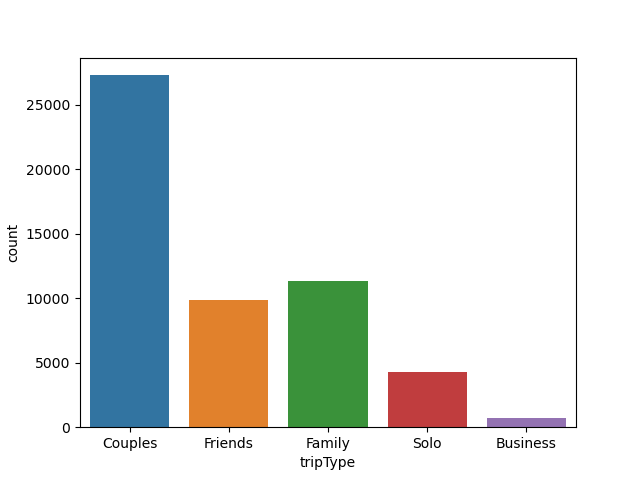

In [130]:
# Bar plot to see tripType categories distribution visually
sns.countplot(data=ds_reviews, x='tripType')
plt.show()

In [131]:
# Total missing Values in tripType
print(ds_reviews['tripType'].isnull().sum())

24855


In [132]:
# Identifying the indices of missing values in tripType
missing_indices = ds_reviews[ds_reviews['tripType'].isnull()].index

In [133]:
# Calculating the distribution of non-missing values in tripType in order to fill the nulls
non_missing_distribution = ds_reviews['tripType'].dropna().value_counts(normalize=True)
print(non_missing_distribution)

tripType
Couples     0.509654
Family      0.212122
Friends     0.184860
Solo        0.080069
Business    0.013295
Name: proportion, dtype: float64


In [134]:
# Assigning random categories to the missing values based on the values distribution
# We opted for the distribution method to randomize missing values in tripType in order 
# to preserve more of the original dataset characteristics
random_categories = np.random.choice(non_missing_distribution.index, size=len(missing_indices), p=non_missing_distribution.values)
ds_reviews.loc[missing_indices, 'tripType'] = random_categories
print(random_categories)

['Family' 'Couples' 'Family' ... 'Family' 'Couples' 'Couples']


In [135]:
# Checking missing values in tripType now
print(ds_reviews['tripType'].isnull().sum())

0


In [136]:
trip_type_counts = ds_reviews['tripType'].value_counts()

In [137]:
ordered_categories = trip_type_counts.index

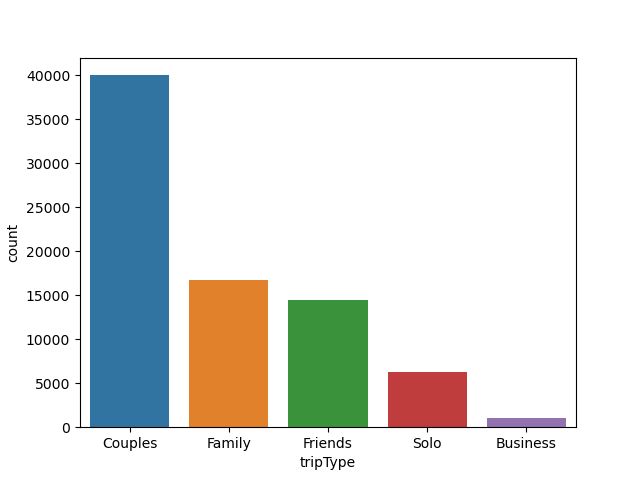

In [138]:
# tripType bar plot with all values now
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=ds_reviews, x='tripType', order=ordered_categories)
plt.show()

In [139]:
# tripType table with all values now
table_data = pd.DataFrame({'Category': trip_type_counts.index, 'Count': trip_type_counts.values})
print(table_data)

   Category  Count
0   Couples  39991
1    Family  16677
2   Friends  14430
3      Solo   6274
4  Business   1037


## Merging ds_reviews and ds_attractions

In [140]:
ds = pd.merge(ds_reviews, ds_attractions, left_on='localID', right_on='ID', how='left')

In [141]:
#next we removed the username and ISO since it was irrelevant information and the ID since it was a duplication 
#for the localID
columns_to_remove = ['ID', 'ISO']

In [142]:
ds = ds.drop(columns=columns_to_remove)

In [143]:
#and reoder the table to be easy to understand the location of the attraction based on the ID
new_order = ['localID','extractionDate', 'Name', 'Country', 'globalRating', 'positionOnRanking', 'sitesOnRanking', 'totalReviews', 'userName', 'userLocation', 'userContributions', 'tripType', 'reviewWritten', 'reviewVisited', 'reviewRating', 'reviewFullText']

In [144]:
ds = ds[new_order]

### Export datasets to user in further analyses

In [145]:
ds.to_excel('Cleaned_DS.xlsx', index=False)

In [10]:
ds_holidays.to_excel('Cleaned_Holidays.xlsx', index=False)